Make sure you write dimesnions using writeDimensions(nx, ny)
2 0.1 40 4


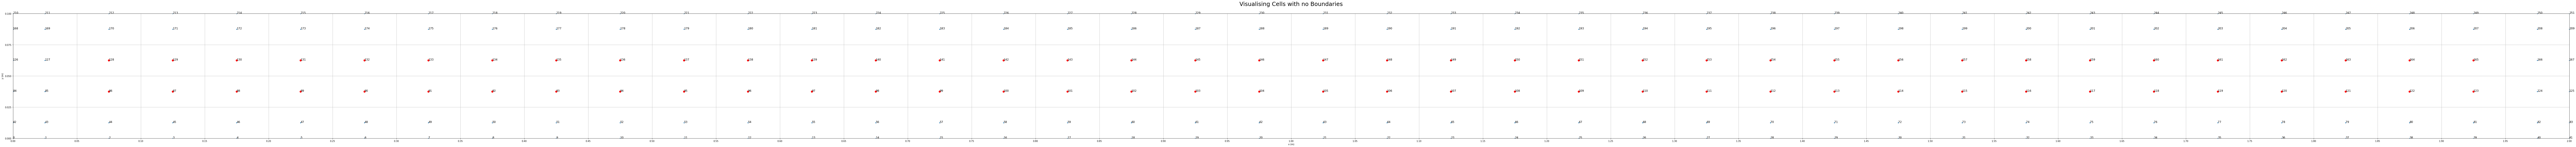

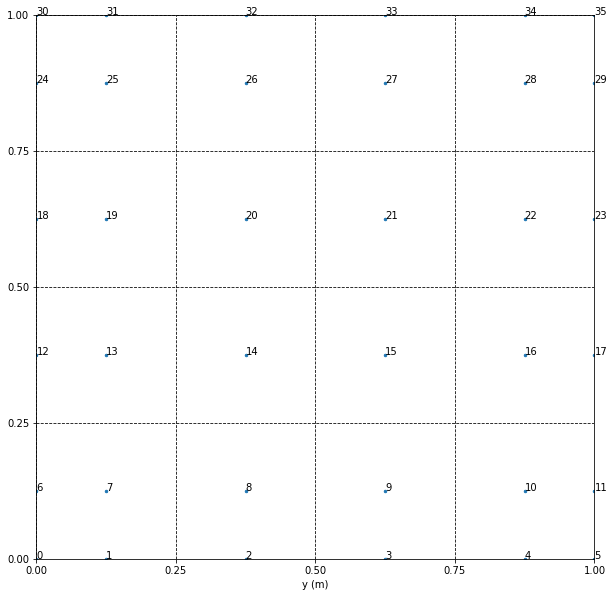

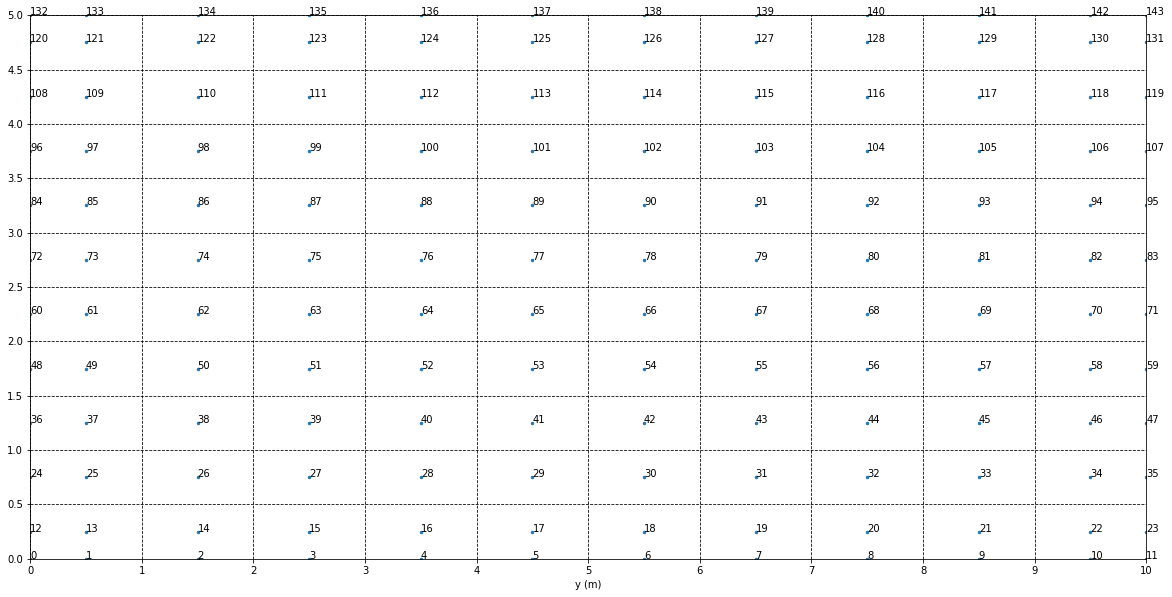

(144, 2)
Number of nodes in Mesh: 144
Number of dimensions: 2
Shear Modulus (mu): 76923076923.07692
Lame Modulus (_lambda): 115384615384.61539
Printing example a-term values for fixed displacement cell on the top boundary:

a_N should be twice the size of a_S
a_E and a_W should be identical

Value for a_N:  307692307692.3077
Value for a_S:  153846153846.15384
Value for a_E:  134615384615.38461
Value for a_W:  134615384615.38461
Value for a_P:  730769230769.2308
Printing a-term values for fixed traction cell on the top boundary:

a_N should 0
a_E and a_W should be identical

Value for a_N:  0
Value for a_S:  153846153846.15384
Value for a_E:  134615384615.38461
Value for a_W:  134615384615.38461
Value for a_P:  423076923076.9231


/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


icorr = 0, Residual = 709614115129721.62500000000000000000, normFactor = 0.00000000000000000002
icorr = 1, Residual = 0.50441396253873549416, normFactor = 0.00000064999999999996
icorr = 2, Residual = 15.85984787855874422746, normFactor = 0.00000064999999999996


In [1]:
from ipynb.fs.full.Background_Functions import *
from ipynb.fs.full._06_Solution_Algorithm import *


import math
import numpy as np

# Time Loop
***

But what if the problem case changes with time? We will have to perform the momentum loop for each timestep. 

Firstly we'll have discretize time:

In [2]:
# tf = 2              #total time in seconds
# dt = tf/20          #size of time steps
# t = np.array(np.arange(0,tf, dt))       #time array

Now for each timestep we need to perform the momentum loop. This is called the time loop. We also need to activate the <code>transient</code> setting

In [3]:
# transient = True

Time Loop Structure:

       for timestep in time:

              reset iteration counter

              momentum loop

              # update variables   
              U_old_old = U_old
              U_old = U_new
                
                  

In [4]:
# # initialise fields
# b_x = np.zeros([(ny+2)*(nx+2),1])
# b_y = np.zeros([(ny+2)*(nx+2),1])

# U_new = initalise_U_field(nx, ny)
# U_old = initalise_U_field(nx, ny)
# U_old_old = initalise_U_field(nx, ny)

# for time in t:

#     # Print timestep
#     print("\nTime = " + str(time))

#     icorr = 1
#     maxcorr = 100000

#     # Momentum loop
#     while True:

#         # Set previous displacement solutions
#         U_previous = U_new        

#         # x-equation
#         # Create A and b matrices
#         A_x = A("x").createMatrix()        
#         A_x, b_x = boundary_conditions(A_x, b_x, U_previous, U_old, U_old_old, "x")

#         # Solve for u
#         u = spsolve(A_x, b_x)
#         u = np.array(u)

#         # y-equation
#         # Create A and b matrices
#         A_y = A("y").createMatrix()
#         A_y, b_y = boundary_conditions(A_y, b_y, U_previous, U_old, U_old_old, "y")

#         # Solve for v
#         v = spsolve(A_y, b_y)
#         v = np.array(v)
            
#         # Update U_new with new x and y displacements
#         U_new = np.vstack((u, v)).T

#         # Calculate the residual of each iteration    
#         normFactor = np.max(U_new)
#         residual = math.sqrt(np.mean((U_new - U_previous)**2))/normFactor

#         # Print values
#         print("icorr = {:01d}, Residual = {:.20f}, normFactor = {:.20f}".format(icorr, residual, normFactor))

#         # Convergence check
#         if residual < tolerance:

#             print("Solution has converged")

#             break
            
#         elif icorr > maxcorr:
            
#             break            
        
#         icorr = icorr + 1

  
#     U_old_old = U_old
#     U_old = U_new

#     # Save displacement field
#     saveArray("U_field_" + str(round(time, 1)) , U_new)



#### Final notebook output: 






In [5]:
nx, ny

(40, 4)

In [6]:
## Define required variables

tf = 2           #total time in seconds
dx = Lx/nx          #length of each control volume in the x-direction
dy = Ly/ny          #length of each control volume in the y-direction
dt = tf/2          #size of time steps
Sfx = dy            #area vector x component (Area of East and West Faces)
Sfy = dx            #area vector y component (Area of North and South Faces)



t = np.array(np.arange(0,tf, dt))        #time vector (could possibly use a list)
x = np.zeros((1,nx+2))   #position vector defining the center points of the control volumes in the x-direction.
x[0,nx+1] = Lx
x[0,1:nx+1] = np.arange(dx/2,Lx,dx)

t = np.array(np.arange(0,tf, dt))        #time vector (could possibly use a list)
y = np.zeros((1,ny+2))   #position vector defining the center points of the control volumes in the y-direction.
y[0,ny+1] = Ly
y[0,1:ny+1] = np.arange(dy/2,Ly,dy)

#rhs vector
b_x = np.zeros([(ny+2)*(nx+2),1])
b_y = np.zeros([(ny+2)*(nx+2),1])

In [7]:
from scipy.sparse.linalg import spsolve

In [8]:
tolerance = 1e-6

# initialise fields
b_x = np.zeros([(ny+2)*(nx+2),1])
b_y = np.zeros([(ny+2)*(nx+2),1])

U_new = initalise_U_field(nx, ny)
U_old = initalise_U_field(nx, ny)
U_old_old = initalise_U_field(nx, ny)

In [9]:
import pandas as pd

transient = False


Time = 0.0
Run time 2:  0.002696850002394058
icorr = 100, Residual = 0.00861212356604922243, normFactor = 0.00003249705169882678, moving average = 7096141151297.88769531250000000000, time = 0.00000
-0.008611123566049223
icorr = 200, Residual = 0.00391950172617213689, normFactor = 0.00006476581829688420, moving average = 0.07861823085172321701, time = 0.00000
-0.003918501726172137
icorr = 300, Residual = 0.00241552991876183400, normFactor = 0.00009594280494077450, moving average = 0.04010188895262908892, time = 0.00000
-0.002414529918761834
icorr = 400, Residual = 0.00169048522083169455, normFactor = 0.00012527359928303755, moving average = 0.02577808059830782178, time = 0.00000
-0.0016894852208316946
icorr = 500, Residual = 0.00126925335111850940, normFactor = 0.00015245683464249713, moving average = 0.01848122154544401888, time = 0.00000
-0.0012682533511185095


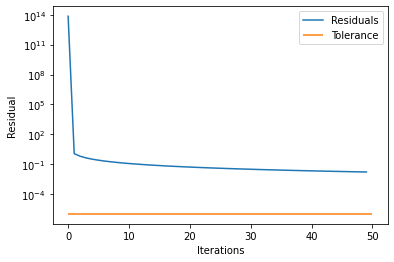

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


icorr = 600, Residual = 0.00099621229232860317, normFactor = 0.00017746280351213696, moving average = 0.01410912138998610121, time = 0.00000
-0.0009952122923286033
icorr = 700, Residual = 0.00080597586732791327, normFactor = 0.00020038269430042990, moving average = 0.01121220401165101861, time = 0.00000
-0.0008049758673279132
icorr = 800, Residual = 0.00066649360837687935, normFactor = 0.00022135356834694316, moving average = 0.00915830620243736002, time = 0.00000
-0.0006654936083768793
icorr = 900, Residual = 0.00056028799332999944, normFactor = 0.00024052471619025249, moving average = 0.00763056477503068140, time = 0.00000
-0.0005592879933299994
icorr = 1000, Residual = 0.00047704693913323425, normFactor = 0.00025804326517604433, moving average = 0.00645329267438051087, time = 0.00000
-0.0004760469391332342


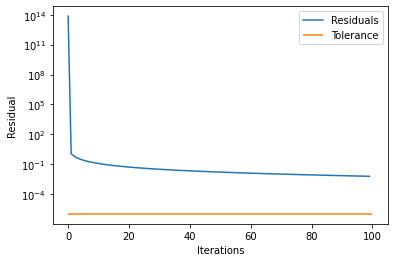

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


icorr = 1100, Residual = 0.00041030429122420275, normFactor = 0.00027404840784763689, moving average = 0.00552131768389426195, time = 0.00000
-0.0004093042912242027
icorr = 1200, Residual = 0.00035580399181212724, normFactor = 0.00028866942941285485, moving average = 0.00476779486889610665, time = 0.00000
-0.0003548039918121272
icorr = 1300, Residual = 0.00031063167466028550, normFactor = 0.00030202537889633904, moving average = 0.00414816234023331412, time = 0.00000
-0.0003096316746602855
icorr = 1400, Residual = 0.00027272507819900015, normFactor = 0.00031422542594546120, moving average = 0.00363154075720680545, time = 0.00000
-0.0002717250781990001
icorr = 1500, Residual = 0.00024058394412077128, normFactor = 0.00032536947993170218, moving average = 0.00319583854278821357, time = 0.00000
-0.00023958394412077128


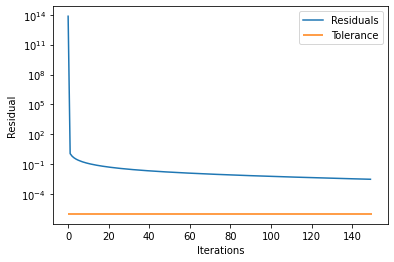

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


icorr = 1600, Residual = 0.00021309076324974128, normFactor = 0.00033554888624589061, moving average = 0.00282482340484080559, time = 0.00000
-0.00021209076324974128
icorr = 1700, Residual = 0.00018939597946063868, normFactor = 0.00034484712066446888, moving average = 0.00250629494859859079, time = 0.00000
-0.00018839597946063868
icorr = 1800, Residual = 0.00016884216633565751, normFactor = 0.00035334044963259185, moving average = 0.00223090284932821745, time = 0.00000
-0.0001678421663356575
icorr = 1900, Residual = 0.00015091257814687931, normFactor = 0.00036109854500196382, moving average = 0.00199135872682478258, time = 0.00000
-0.0001499125781468793
icorr = 2000, Residual = 0.00013519540317476043, normFactor = 0.00036818505072805840, moving average = 0.00178189643878360737, time = 0.00000
-0.00013419540317476043


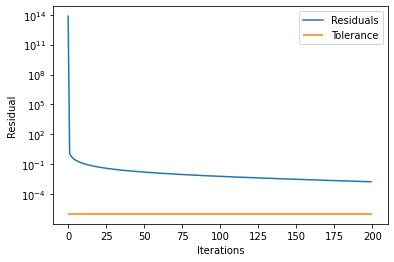

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


icorr = 2100, Residual = 0.00012135840045231679, normFactor = 0.00037465810282585736, moving average = 0.00159789383198838397, time = 0.00000
-0.00012035840045231679
icorr = 2200, Residual = 0.00010913056404954402, normFactor = 0.00038057080534266853, moving average = 0.00143560218750455248, time = 0.00000
-0.00010813056404954402
icorr = 2300, Residual = 0.00009828864330818262, normFactor = 0.00038597166558802543, moving average = 0.00129194916021610159, time = 0.00000
-9.728864330818262e-05
icorr = 2400, Residual = 0.00008864708172350831, normFactor = 0.00039090499189215421, moving average = 0.00116439290278426357, time = 0.00000
-8.764708172350831e-05
icorr = 2500, Residual = 0.00008005040350165947, normFactor = 0.00039541125702375083, moving average = 0.00105081249027371153, time = 0.00000
-7.905040350165948e-05


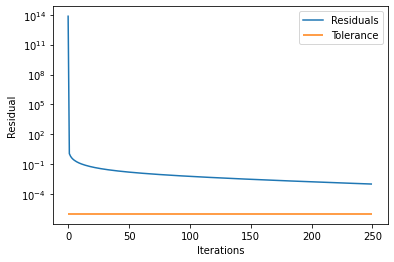

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


icorr = 2600, Residual = 0.00007236737964967083, normFactor = 0.00039952743018921644, moving average = 0.00094942451446783339, time = 0.00000
-7.136737964967083e-05
icorr = 2700, Residual = 0.00006548650602975815, normFactor = 0.00040328728030805916, moving average = 0.00085871882614271897, time = 0.00000
-6.448650602975815e-05
icorr = 2800, Residual = 0.00005931246111968132, normFactor = 0.00040672165304538293, moving average = 0.00077740847810811239, time = 0.00000
-5.8312461119681325e-05
icorr = 2900, Residual = 0.00005376330401898739, normFactor = 0.00040985872386465965, moving average = 0.00070439033104109693, time = 0.00000
-5.276330401898739e-05
icorr = 3000, Residual = 0.00004876823786951976, normFactor = 0.00041272422917708221, moving average = 0.00063871375717532933, time = 0.00000
-4.7768237869519763e-05


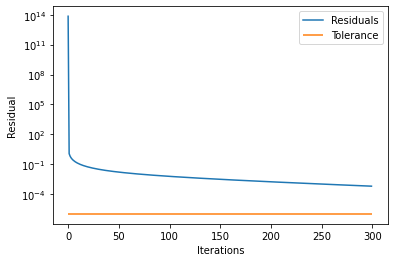

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


icorr = 3100, Residual = 0.00004426580952605854, normFactor = 0.00041534167748047694, moving average = 0.00057955555875374449, time = 0.00000
-4.326580952605854e-05
icorr = 3200, Residual = 0.00004020244896885659, normFactor = 0.00041773254222289796, moving average = 0.00052619970279474339, time = 0.00000
-3.9202448968856594e-05
icorr = 3300, Residual = 0.00003653127561755739, normFactor = 0.00041991643796971111, moving average = 0.00047802082222539433, time = 0.00000
-3.553127561755739e-05
icorr = 3400, Residual = 0.00003321111603807734, normFactor = 0.00042191128131957166, moving average = 0.00043447068742230691, time = 0.00000
-3.221111603807735e-05
icorr = 3500, Residual = 0.00003020569036416611, normFactor = 0.00042373343789309822, moving average = 0.00039506703893732372, time = 0.00000
-2.9205690364166105e-05


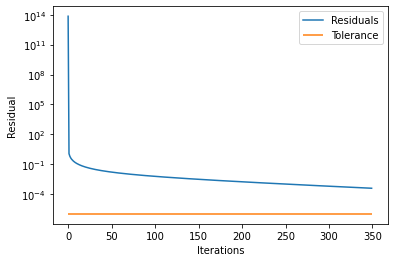

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


icorr = 3600, Residual = 0.00002748293433986401, normFactor = 0.00042539785659480116, moving average = 0.00035938431118277998, time = 0.00000
-2.6482934339864004e-05
icorr = 3700, Residual = 0.00002501443112513612, normFactor = 0.00042691819225344698, moving average = 0.00032704588109027467, time = 0.00000
-2.4014431125136117e-05
icorr = 3800, Residual = 0.00002277493249776219, normFactor = 0.00042830691764567531, moving average = 0.00029771755475111031, time = 0.00000
-2.177493249776219e-05
icorr = 3900, Residual = 0.00002074195333239660, normFactor = 0.00042957542582377367, moving average = 0.00027110206537929183, time = 0.00000
-1.9741953332396596e-05
icorr = 4000, Residual = 0.00001889542645805575, normFactor = 0.00043073412358048385, moving average = 0.00024693440232781226, time = 0.00000
-1.789542645805575e-05


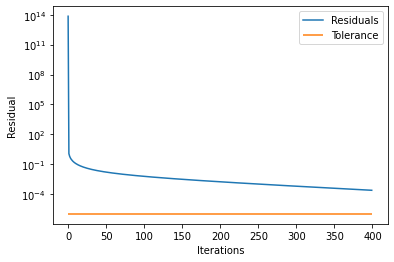

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


icorr = 4100, Residual = 0.00001721740756927117, normFactor = 0.00043179251682936480, moving average = 0.00022497782687062041, time = 0.00000
-1.6217407569271173e-05
icorr = 4200, Residual = 0.00001569182182918601, normFactor = 0.00043275928858930556, moving average = 0.00020502045862855759, time = 0.00000
-1.4691821829186005e-05
icorr = 4300, Residual = 0.00001430424538844655, normFactor = 0.00043364237021941570, moving average = 0.00018687233850732326, time = 0.00000
-1.3304245388446552e-05
icorr = 4400, Residual = 0.00001304171627292073, normFactor = 0.00043444900648859238, moving average = 0.00017036289158039899, time = 0.00000
-1.2041716272920732e-05
icorr = 4500, Residual = 0.00001189257009912855, normFactor = 0.00043518581501064322, moving average = 0.00015533872714083779, time = 0.00000
-1.0892570099128551e-05


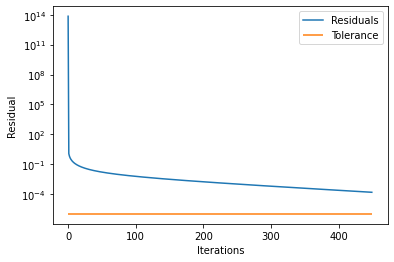

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


icorr = 4600, Residual = 0.00001084629685500432, normFactor = 0.00043585884053493691, moving average = 0.00014166172435553848, time = 0.00000
-9.846296855004323e-06
icorr = 4700, Residual = 0.00000989341565200581, normFactor = 0.00043647360453817207, moving average = 0.00012920736082708693, time = 0.00000
-8.893415652005805e-06
icorr = 4800, Residual = 0.00000902536484326281, normFactor = 0.00043703515052085859, moving average = 0.00011786324862309000, time = 0.00000
-8.025364843262805e-06
icorr = 4900, Residual = 0.00000823440535956363, normFactor = 0.00043754808538588999, moving average = 0.00010752784820608099, time = 0.00000
-7.23440535956363e-06
icorr = 5000, Residual = 0.00000751353542249800, normFactor = 0.00043801661723083995, moving average = 0.00009810933546314174, time = 0.00000
-6.513535422497996e-06


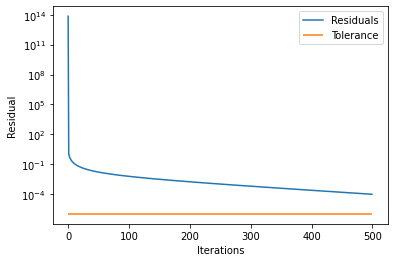

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


icorr = 5100, Residual = 0.00000685641512594911, normFactor = 0.00043844458987422571, moving average = 0.00008952460100189470, time = 0.00000
-5.856415125949106e-06
icorr = 5200, Residual = 0.00000625729957067778, normFactor = 0.00043883551438745412, moving average = 0.00008169836407265671, time = 0.00000
-5.257299570677779e-06
icorr = 5300, Residual = 0.00000571097945183455, normFactor = 0.00043919259790022242, moving average = 0.00007456238618932448, time = 0.00000
-4.710979451834551e-06
icorr = 5400, Residual = 0.00000521272816417219, normFactor = 0.00043951876991329546, moving average = 0.00006805477170200369, time = 0.00000
-4.21272816417219e-06
icorr = 5500, Residual = 0.00000475825461231797, normFactor = 0.00043981670632874472, moving average = 0.00006211934447150029, time = 0.00000
-3.758254612317973e-06


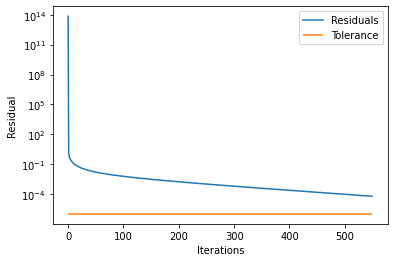

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


icorr = 5600, Residual = 0.00000434366103608199, normFactor = 0.00044008885140606928, moving average = 0.00005670509130122433, time = 0.00000
-3.3436610360819864e-06
icorr = 5700, Residual = 0.00000396540525449832, normFactor = 0.00044033743781373357, moving average = 0.00005176566410968275, time = 0.00000
-2.965405254498318e-06
icorr = 5800, Residual = 0.00000362026681399276, normFactor = 0.00044056450494496882, moving average = 0.00004725893392780784, time = 0.00000
-2.6202668139927573e-06
icorr = 5900, Residual = 0.00000330531658879192, normFactor = 0.00044077191565007634, moving average = 0.00004314659069059958, time = 0.00000
-2.3053165887919244e-06
icorr = 6000, Residual = 0.00000301788944833857, normFactor = 0.00044096137151842331, moving average = 0.00003939378365041863, time = 0.00000
-2.0178894483385705e-06


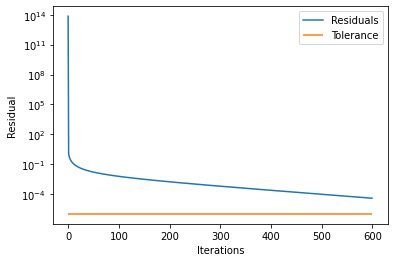

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


icorr = 6100, Residual = 0.00000275555964493629, normFactor = 0.00044113442683953077, moving average = 0.00003596879784030667, time = 0.00000
-1.7555596449362921e-06
icorr = 6200, Residual = 0.00000251611863973667, normFactor = 0.00044129250135227830, moving average = 0.00003284276261994488, time = 0.00000
-1.5161186397366666e-06
icorr = 6300, Residual = 0.00000229755508356948, normFactor = 0.00044143689189461547, moving average = 0.00002998938885703970, time = 0.00000
-1.2975550835694832e-06
icorr = 6400, Residual = 0.00000209803674173615, normFactor = 0.00044156878304048519, moving average = 0.00002738473164231292, time = 0.00000
-1.0980367417361528e-06
icorr = 6500, Residual = 0.00000191589414970197, normFactor = 0.00044168925682032433, moving average = 0.00002500697589297289, time = 0.00000
-9.158941497019714e-07


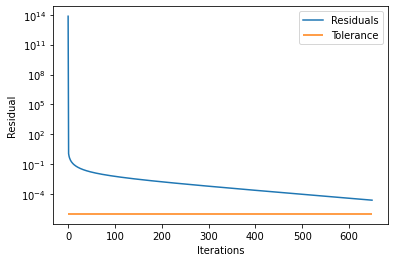

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


icorr = 6600, Residual = 0.00000174960583008422, normFactor = 0.00044179930159658136, moving average = 0.00002283624243003361, time = 0.00000
-7.496058300842247e-07
icorr = 6700, Residual = 0.00000159778489832525, normFactor = 0.00044189982017221827, moving average = 0.00002085441247248126, time = 0.00000
-5.977848983252501e-07
icorr = 6800, Residual = 0.00000145916693466810, normFactor = 0.00044199163719825616, moving average = 0.00001904496862269510, time = 0.00000
-4.591669346680967e-07
icorr = 6900, Residual = 0.00000133259897196040, normFactor = 0.00044207550593773469, moving average = 0.00001739285075945162, time = 0.00000
-3.325989719603981e-07
icorr = 7000, Residual = 0.00000121702952789416, normFactor = 0.00044215211444677770, moving average = 0.00001588432530438555, time = 0.00000
-2.170295278941598e-07


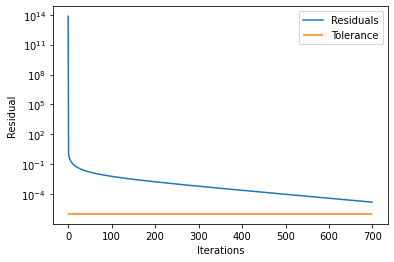

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


icorr = 7100, Residual = 0.00000111149952684658, normFactor = 0.00044222209121874364, moving average = 0.00001450686657795973, time = 0.00000
-1.1149952684658178e-07
icorr = 7200, Residual = 0.00000101513408072107, normFactor = 0.00044228601034078743, moving average = 0.00001324904907058151, time = 0.00000
-1.513408072106584e-08
9.986988349651621e-07
icorr = 7218, Residual = 0.00000099869883496516, normFactor = 0.00044229691367022954, moving average = 0.00001324904907058151, time = 0.00000

Time = 1.0
Run time 2:  0.00216196000110358
9.968892257132487e-07
icorr = 2, Residual = 0.00000099688922571325, normFactor = 0.00044229811421852487, moving average = 0.00001324904907058151, time = 1.00000
Run time:  530.2224024870084


In [10]:
## Time loop

!rm -r Solution
! mkdir Solution

import timeit

start = timeit.default_timer()

#Your statements here

for time in t:

    print("\nTime = " + str(time))
    
    # Set number of maximum iterations for convergence
    
    icorr = 1
    maxcorr = 100000
    # fac = 10**math.ceil((math.log((A("x").a_P), 10)))

    # Make directory

    ! mkdir Solution/{time}

    residual_array = np.array([])
    moving_average_array = np.array([])
    moving_average_graph_array = np.array([])

    start_2 = timeit.default_timer()
    A_x = A("x").createMatrix()
    A_y = A("y").createMatrix()
    stop_2 = timeit.default_timer()
    print('Run time 2: ', stop_2 - start_2)

    
    while True:
    # for iteration in [1]:
        
        U_previous = U_new #store latest guess values    # change_u new to U

        A_x = A("x").createMatrix()        
        A_x, b_x = boundary_conditions(A_x, b_x, U_previous, U_old, U_old_old, "x")

        pd.DataFrame(A_x).to_csv("Solution/" + "A_x" + ".csv", index=False, header=None)

        ## Solve the x-equation
        
        Ux = spsolve(A_x, b_x)
        Ux = np.array(Ux)
        
        ## Prepare matrix A and b vector for the y-equation
        
        # A_y = A("y").createMatrix()
        A_y, b_y = boundary_conditions(A_y, b_y, U_previous, U_old, U_old_old, "y")
        
        ## Solve the y-equation
        Uy = spsolve(A_y, b_y)
        Uy = np.array(Uy)
        
        # ## Update U.New with new x and y displacements

        U_new = np.vstack((Ux, Uy)).T
       
        ## Calculate the residual of each iteration
        
        normFactor = np.max(U_new)
        residual = math.sqrt(np.mean((U_new - U_previous)**2))/normFactor
        tolerance = 1e-6

        residual_array = np.append(residual_array, residual)

        # print(icorr)
        # print("icorr = {:01d}, Residual = {:.20f}, normFactor = {:.20f}, time = {:.5f}".format(icorr, residual, normFactor, time))

    
        ##print out residual of each iteration
        if icorr%100 == 0 :
            moving_average = np.mean(residual_array[len(residual_array)-100 :len(residual_array) ])
            moving_average_array = np.append(moving_average_array, moving_average)
            print("icorr = {:01d}, Residual = {:.20f}, normFactor = {:.20f}, moving average = {:.20f}, time = {:.5f}".format(icorr, residual, normFactor, moving_average, time))
            print(tolerance - residual)

        if icorr%10 == 0 :
            moving_average_graph = np.mean(residual_array[len(residual_array)-10 :len(residual_array) ])
            moving_average_graph_array = np.append(moving_average_graph_array, moving_average_graph)

        # Print residual progress
        if icorr % 500 == 0:

            # plt.plot(np.arange(0, len(residual_array)), residual_array, label = "Residuals")
            plt.plot(np.arange(0, len(moving_average_graph_array)), moving_average_graph_array, label = "Residuals")
            plt.hlines(tolerance, 0, len(moving_average_graph_array), color = "C1", label  = "Tolerance")
            plt.yscale("log")
            plt.xlabel("Iterations")
            plt.ylabel("Residual")
            plt.legend()
            plt.show()


        ## Convergence check
        
        if residual < tolerance:

            print(residual)
            
            print("icorr = {:01d}, Residual = {:.20f}, normFactor = {:.20f}, moving average = {:.20f}, time = {:.5f}".format(icorr, residual, normFactor, moving_average, time))

            break
            
        elif icorr > maxcorr:
            
            break            
        
        icorr = icorr + 1
    
    ## Update variables
    
    U_old_old = U_old
    U_old = U_new

    # Save displacement field
    saveArray("U_field_" + str(round(time, 1)) , U_new)

stop = timeit.default_timer()

print('Run time: ', stop - start)

In [11]:
fac

NameError: name 'fac' is not defined

In [ ]:
saveArray("U_field_" + str(round(time, 1)) , U_new)


In [ ]:
u_reshape_x = U_new[:,0].reshape(ny+2, nx+2)
u_reshape_y = U_new[:,1].reshape(ny+2, nx+2)

U = np.zeros((ny+2,nx+2))
V = np.zeros((ny+2,nx+2)) 

U[:, :] = u_reshape_x
V[:, :] = u_reshape_y 

#Modulus of displacement

disp_mod = np.sqrt((U**2) + (V**2))
disp_mod_converted = disp_mod*1e6 #Convert displacement to micrometers

### Plot the results

import plotly.graph_objects as go

disp_mod = np.sqrt((U**2) + (V**2))*1e-10

dispx, dispy = np.meshgrid(x, y)
fig = go.Figure(data=[go.Surface(z=disp_mod_converted, x=dispx, y=dispy)])
    
fig.show()   

print("U graph")
fig = go.Figure(data=[go.Surface(z=U, x=dispx, y=dispy)])

fig.show()   

print("V graph")
fig = go.Figure(data=[go.Surface(z=V, x=dispx, y=dispy)])

fig.show()

U graph


V graph


#### Final notebook output: 




